In [1]:
import math
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot_2samples
import random
import seaborn as sns

In [2]:
data=pd.read_csv("Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
#CustomerID feature has no use so dropped it.
data.drop('customerID', axis='columns', inplace=True)

In [5]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#Since TotalCharges is object Type (It should have come under quantitative feature), I would change it to numeric data type
data.TotalCharges=pd.to_numeric(data.TotalCharges,errors='coerce')
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
data.describe(include=['object']).T

,count,unique,top,freq
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095
TechSupport,7043,3,No,3473


In [8]:
data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

The TotalCharges column has 11 missing values while all other columns are complete. This is likely because these customers are new (tenure = 0) and haven't accumulated any charges yet.

In [9]:
# let us drop all rows with any missing value
data.dropna(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

In [11]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


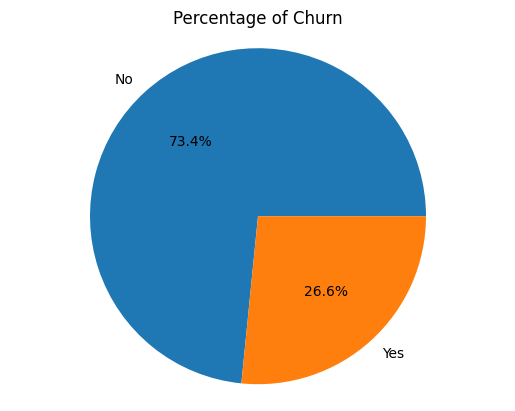

Churn
No     5163
Yes    1869
Name: count, dtype: int64


In [12]:
# Plotting the churn rates
churn_counts = data['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%')
plt.title("Percentage of Churn")
plt.axis('equal')
plt.show()
print(data.Churn.value_counts())

Approximately 26.5%(More than one-forth) of customers have churned, representing a significant portion of the customer base.

### Visualising the data by grouping different features

gender  Churn
Female  No       2544
        Yes       939
Male    No       2619
        Yes       930
Name: Churn, dtype: int64


<Axes: xlabel='gender'>

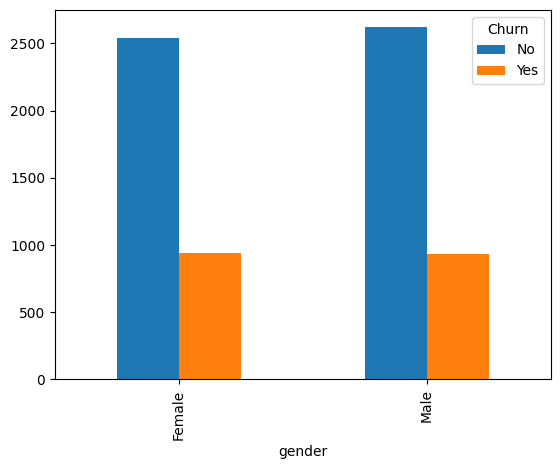

In [13]:
# Gender and Churn rate
grouped_gender_churn = data.groupby(['gender', 'Churn'])['Churn'].count()
print(grouped_gender_churn)
grouped_gender_churn.unstack().plot(kind='bar')

Gender does not appear to be a strong predictor of churn as the proportions of male and female customers who churn are relatively similar.

Partner  Churn
No       No       2439
         Yes      1200
Yes      No       2724
         Yes       669
Name: Churn, dtype: int64


<Axes: xlabel='Partner'>

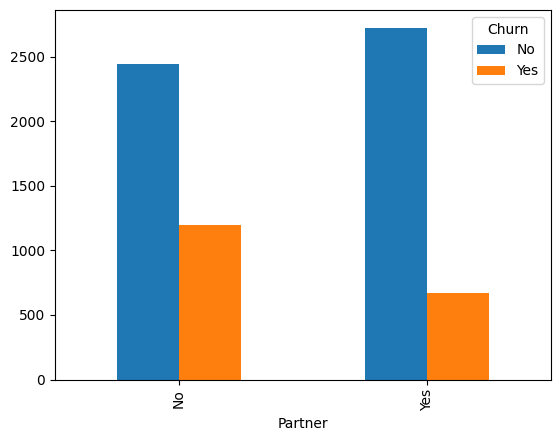

In [14]:
# Having partner and Churn rate
grouped_Partner_churn = data.groupby(['Partner', 'Churn'])['Churn'].count()
print(grouped_Partner_churn)
grouped_Partner_churn.unstack().plot(kind='bar')

Customers without partners show a higher churn rate than those with partners, indicating that single customers may be less stable in their service commitments.

Dependents  Churn
No          No       3390
            Yes      1543
Yes         No       1773
            Yes       326
Name: Churn, dtype: int64


<Axes: xlabel='Dependents'>

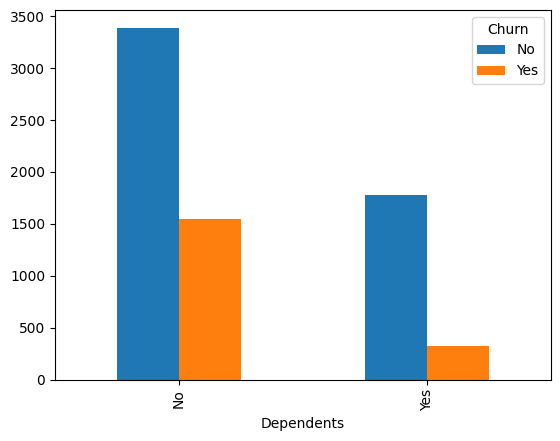

In [15]:
# Dependency and Churn rate
grouped_Dependents_churn = data.groupby(['Dependents', 'Churn'])['Churn'].count()
print(grouped_Dependents_churn)
grouped_Dependents_churn.unstack().plot(kind='bar')

Above plot shows the customers with dependents appear to have a lower churn rate compared to those without dependents.

PhoneService  Churn
No            No        510
              Yes       170
Yes           No       4653
              Yes      1699
Name: Churn, dtype: int64


<Axes: xlabel='PhoneService'>

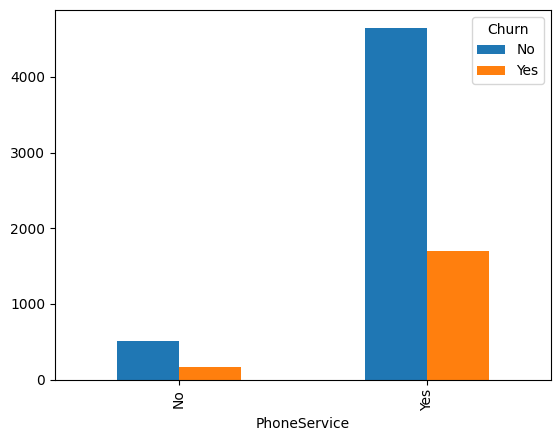

In [16]:
# PhoneServices and Churn rate
grouped_Phone_churn = data.groupby(['PhoneService', 'Churn'])['Churn'].count()
print(grouped_Phone_churn)
grouped_Phone_churn.unstack().plot(kind='bar')

We can see from the above plots that people having no phoneservies have less churning rate, and customers with fewer are less likely to leave, possibly because they are less engaged or have fewer dependencies on the provider.

InternetService  Churn
DSL              No       1957
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1407
                 Yes       113
Name: Churn, dtype: int64


<Axes: xlabel='InternetService'>

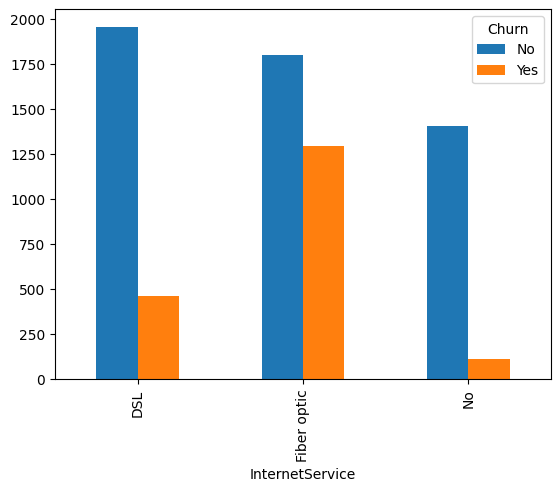

In [17]:
# Internet Servies and Churn rate
grouped_Int_churn = data.groupby(['InternetService', 'Churn'])['Churn'].count()
print(grouped_Int_churn)
grouped_Int_churn.unstack().plot(kind='bar')

Fiber optic customers show a substantially higher churn rate compared to DSL users or those without internet service. This suggests potential issues with the fiber service quality, pricing, or customer expectations.

PaperlessBilling  Churn
No                No       2395
                  Yes       469
Yes               No       2768
                  Yes      1400
Name: Churn, dtype: int64


<Axes: xlabel='PaperlessBilling'>

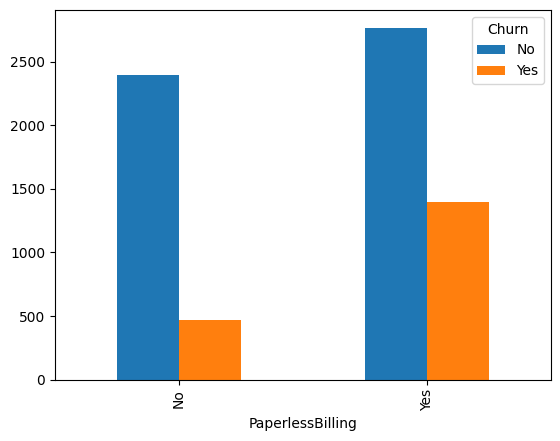

In [18]:
# PaperlessBilling and Churn rate
grouped_paperless_churn = data.groupby(['PaperlessBilling', 'Churn'])['Churn'].count()
print(grouped_paperless_churn)
grouped_paperless_churn.unstack().plot(kind='bar')

Customers using paperless billing are more likely to churn than those receiving paper bills. This could indicate that paperless customers are more digitally engaged and price-sensitive.

In [19]:
# Crosstab for PaymentMethod vs Churn
ct_payment = pd.crosstab(data['PaymentMethod'], data['Churn'], margins=True)
print("Payment Method vs Churn:")
print(ct_payment, "\n")

# Crosstab for Contract vs Churn
ct_contract = pd.crosstab(data['Contract'], data['Churn'], margins=True)
print("Contract vs Churn:")
print(ct_contract, "\n")

# Crosstab for TechSupport vs Churn
ct_tech = pd.crosstab(data['TechSupport'], data['Churn'], margins=True)
print("TechSupport vs Churn:")
print(ct_tech)


Payment Method vs Churn:
Churn                        No   Yes   All
PaymentMethod                              
Bank transfer (automatic)  1284   258  1542
Credit card (automatic)    1289   232  1521
Electronic check           1294  1071  2365
Mailed check               1296   308  1604
All                        5163  1869  7032 

Contract vs Churn:
Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1306   166  1472
Two year        1637    48  1685
All             5163  1869  7032 

TechSupport vs Churn:
Churn                  No   Yes   All
TechSupport                          
No                   2026  1446  3472
No internet service  1407   113  1520
Yes                  1730   310  2040
All                  5163  1869  7032


Here two key factors significantly correlate with churn:

Payment method - Electronic check users have nearly 3x higher churn than automatic payment methods.

Contract type - Month-to-month customers are 5-8x more likely to churn than those on 1-2 year contracts.

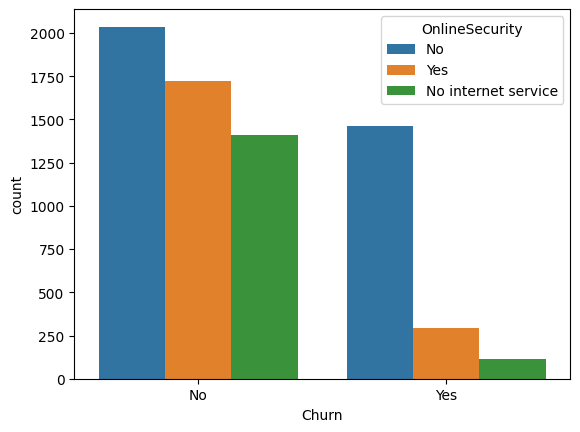

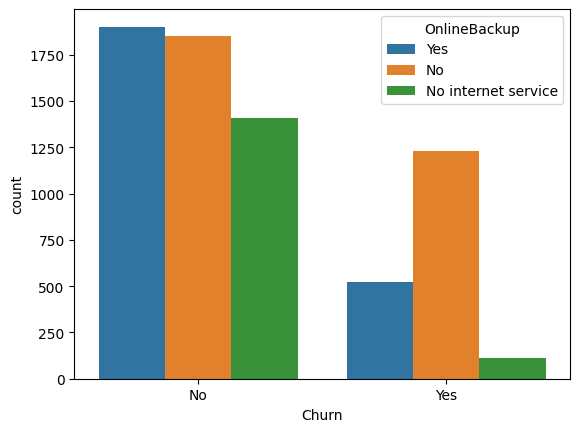

In [20]:
Sec_plot = sns.countplot(data=data, x="Churn", hue="OnlineSecurity")
plt.show()

Back_plot = sns.countplot(data=data, x="Churn", hue="OnlineBackup")
plt.show()

Customers without online security or backup services are significantly more likely to churn. Offering these protective services could be an effective retention strategy.

### Distributions of numeric features

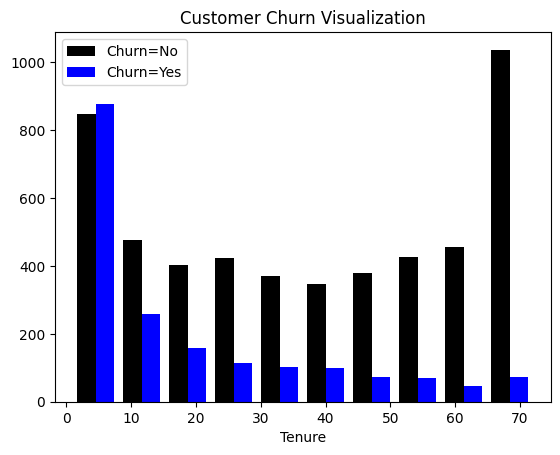

In [21]:
# Tenure vs Churn
tenure_churn_no=data[data.Churn=='No'].tenure 
tenure_churn_yes=data[data.Churn=='Yes'].tenure 
plt.title("Customer Churn Visualization") 
plt.xlabel('Tenure') 
plt.ylabel=('Number of Customers') 
plt.hist([tenure_churn_no,tenure_churn_yes],color=['black','blue'],label=['Churn=No','Churn=Yes']) 
plt.legend()

Churned customers are heavily concentrated in the lower tenure ranges (0-12 months), while long-term customers show much higher loyalty. The first year appears to be the critical retention period.

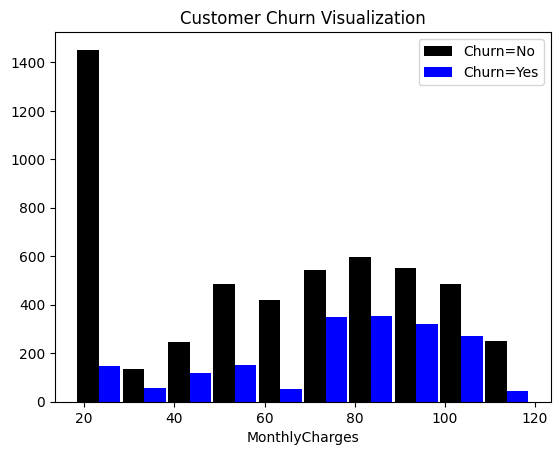

In [22]:
# Monthly Charges vs Churn
monthlycharge_churn_no=data[data.Churn=='No'].MonthlyCharges
monthlycharge_churn_yes=data[data.Churn=='Yes'].MonthlyCharges
plt.title("Customer Churn Visualization")
plt.xlabel('MonthlyCharges')
plt.ylabel=('Number of Customers')
plt.hist([monthlycharge_churn_no,monthlycharge_churn_yes],rwidth=0.95,color=['black','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()

Customers with higher monthly charges are more prone to churn. This suggests price sensitivity is a major factor in customer retention, especially for premium service users.

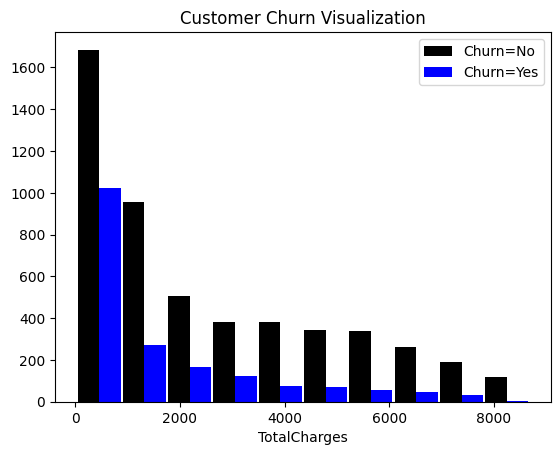

In [23]:
Tcharge_churn_no=data[data.Churn=='No'].TotalCharges
Tcharge_churn_yes=data[data.Churn=='Yes'].TotalCharges
plt.title("Customer Churn Visualization")
plt.xlabel('TotalCharges')
plt.ylabel=('Number of Customers')
plt.hist([Tcharge_churn_no,Tcharge_churn_yes],rwidth=0.95,color=['black','blue'],label=['Churn=No','Churn=Yes'])
plt.legend()

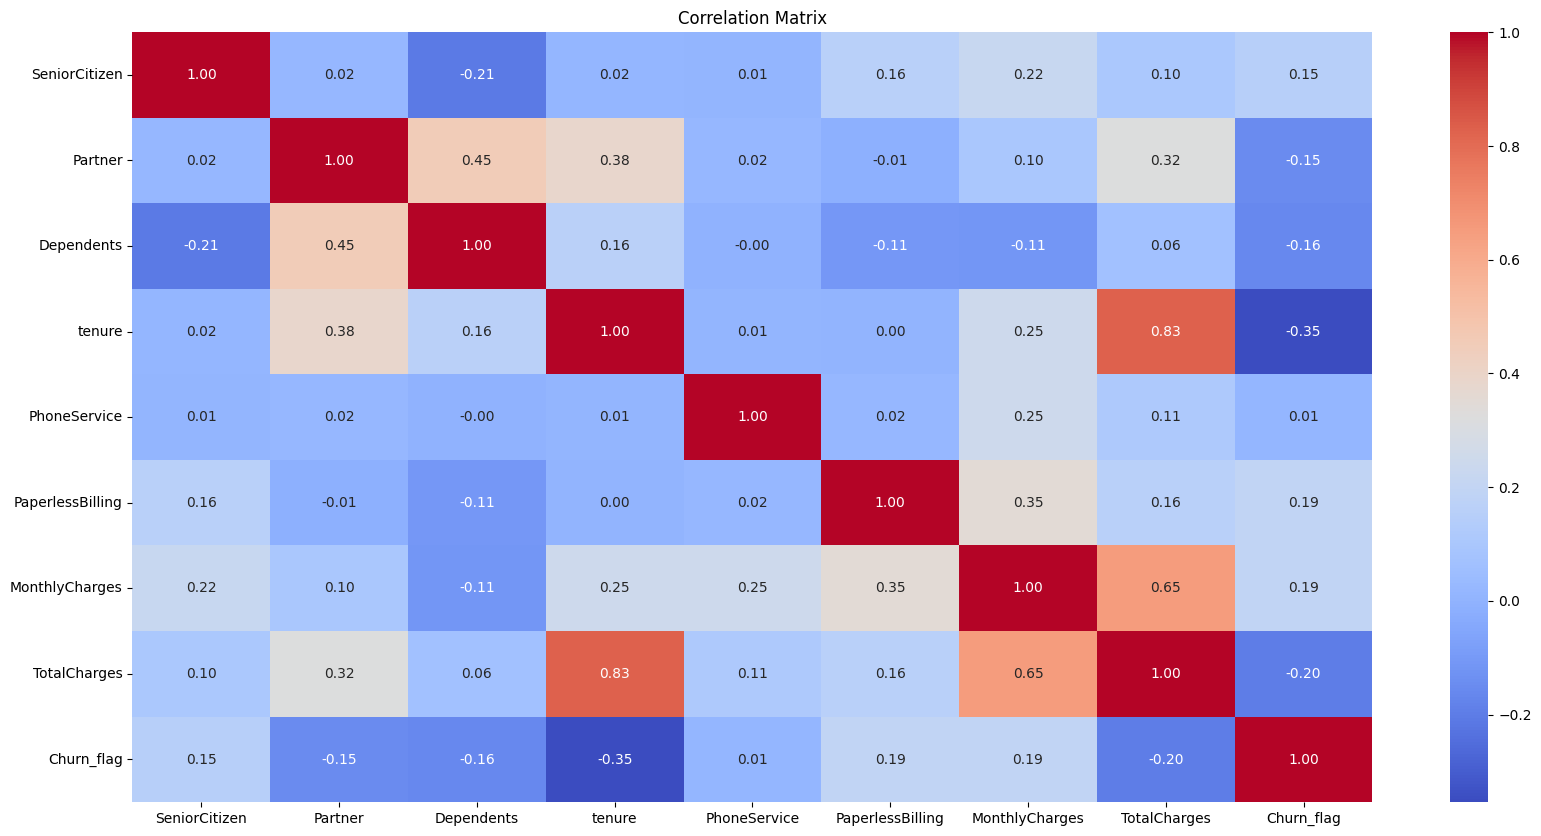

In [25]:
# Select only numeric columns for correlation
df = data.copy()
df['Churn_flag'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(20,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


The strongest correlations are:
Total charges and tenure (0.83) - expected as longer-tenured customers accumulate higher total charges.

Monthly charges and total charges (0.65) - customers with higher monthly fees naturally accumulate higher total bills.

Tenure shows a moderate negative correlation with churn, confirming that newer customers are more likely to leave

### Plotting the Q-Q Plot

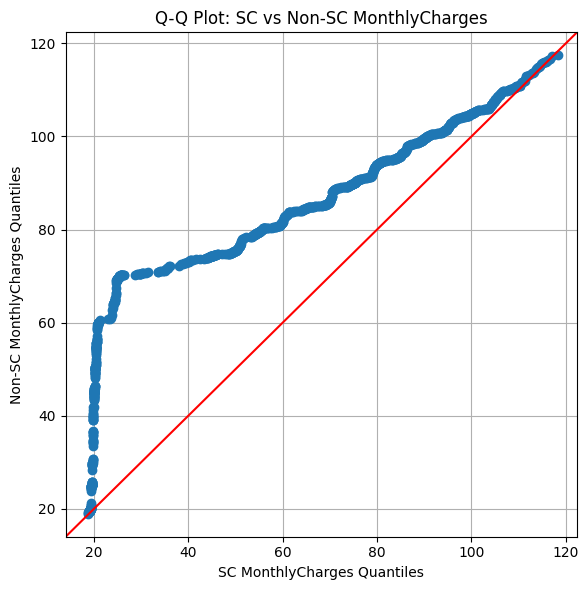

In [26]:
data['SeniorCitizen'] = data['SeniorCitizen'].map({0: 'Non-SC', 1: 'SC'})

sc_charges = data.loc[data['SeniorCitizen'] == 'SC', 'MonthlyCharges'].dropna()
nsc_charges = data.loc[data['SeniorCitizen'] == 'Non-SC', 'MonthlyCharges'].dropna()

fig, ax = plt.subplots(figsize=(6, 6))
qqplot_2samples(sc_charges, nsc_charges, line='45', ax=ax)
ax.set_xlabel('SC MonthlyCharges Quantiles')
ax.set_ylabel('Non-SC MonthlyCharges Quantiles')
ax.set_title('Q-Q Plot: SC vs Non-SC MonthlyCharges')
ax.grid(True)
plt.tight_layout()
plt.show()


Points deviating above the 45° line at higher quantiles indicate non-senior citizens often pay higher monthly charges than senior customers.

Closer alignment at lower quantiles shows both groups share similar lower‐end billing, but seniors’ distribution skews toward higher values.

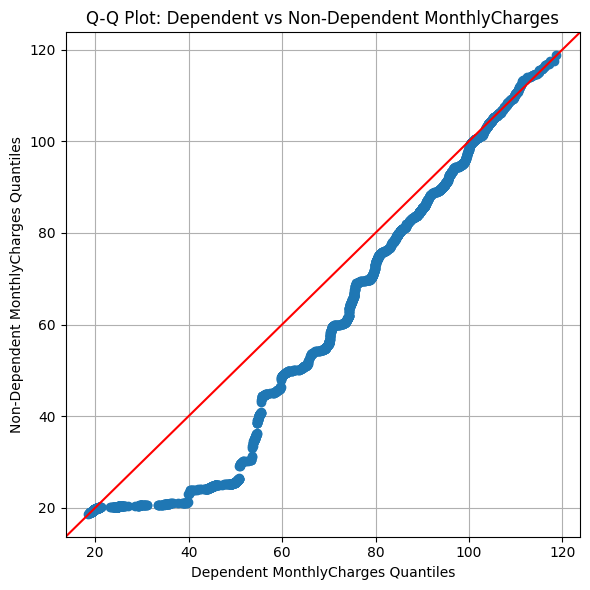

In [27]:
data['Dependents'] = data['Dependents'].map({'Yes': 'Dependent', 'No': 'Non-Dependent'}) # Map 'Dependents' column to labels

dependent_charges = data.loc[data['Dependents'] == 'Dependent', 'MonthlyCharges'].dropna()
non_dependent_charges = data.loc[data['Dependents'] == 'Non-Dependent', 'MonthlyCharges'].dropna()

fig, ax = plt.subplots(figsize=(6, 6))
qqplot_2samples(dependent_charges, non_dependent_charges, line='45', ax=ax)
ax.set_xlabel('Dependent MonthlyCharges Quantiles')
ax.set_ylabel('Non-Dependent MonthlyCharges Quantiles')
ax.set_title('Q-Q Plot: Dependent vs Non-Dependent MonthlyCharges')
ax.grid(True)
plt.tight_layout()
plt.show()


Near‐linear alignment along the 45° line suggests dependents and non-dependents have largely similar billing distributions.

Minor deviations at the tails indicate a few dependent customers pay slightly more (high bills) than non-dependents. 

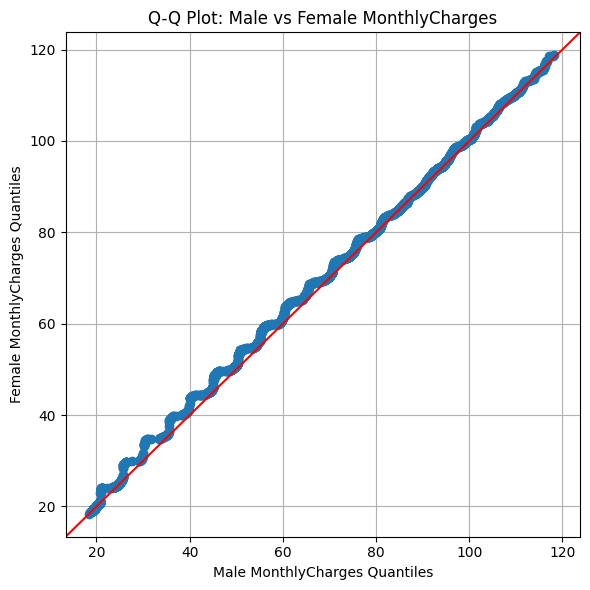

In [28]:
male_charges = data.loc[data['gender'] == 'Male', 'MonthlyCharges'].dropna()
female_charges = data.loc[data['gender'] == 'Female', 'MonthlyCharges'].dropna()

fig, ax = plt.subplots(figsize=(6, 6))
qqplot_2samples(male_charges, female_charges, line='45', ax=ax)
ax.set_xlabel('Male MonthlyCharges Quantiles')
ax.set_ylabel('Female MonthlyCharges Quantiles')
ax.set_title('Q-Q Plot: Male vs Female MonthlyCharges')
ax.grid(True)
plt.tight_layout()
plt.show()


Points mostly lie on the 45° line, showing male and female customers have nearly identical monthly charge distributions.

Small departures at extreme quantiles suggest a few high‐bill males exceed their female counterparts, but overall distributions match closely. 

### Box Plot

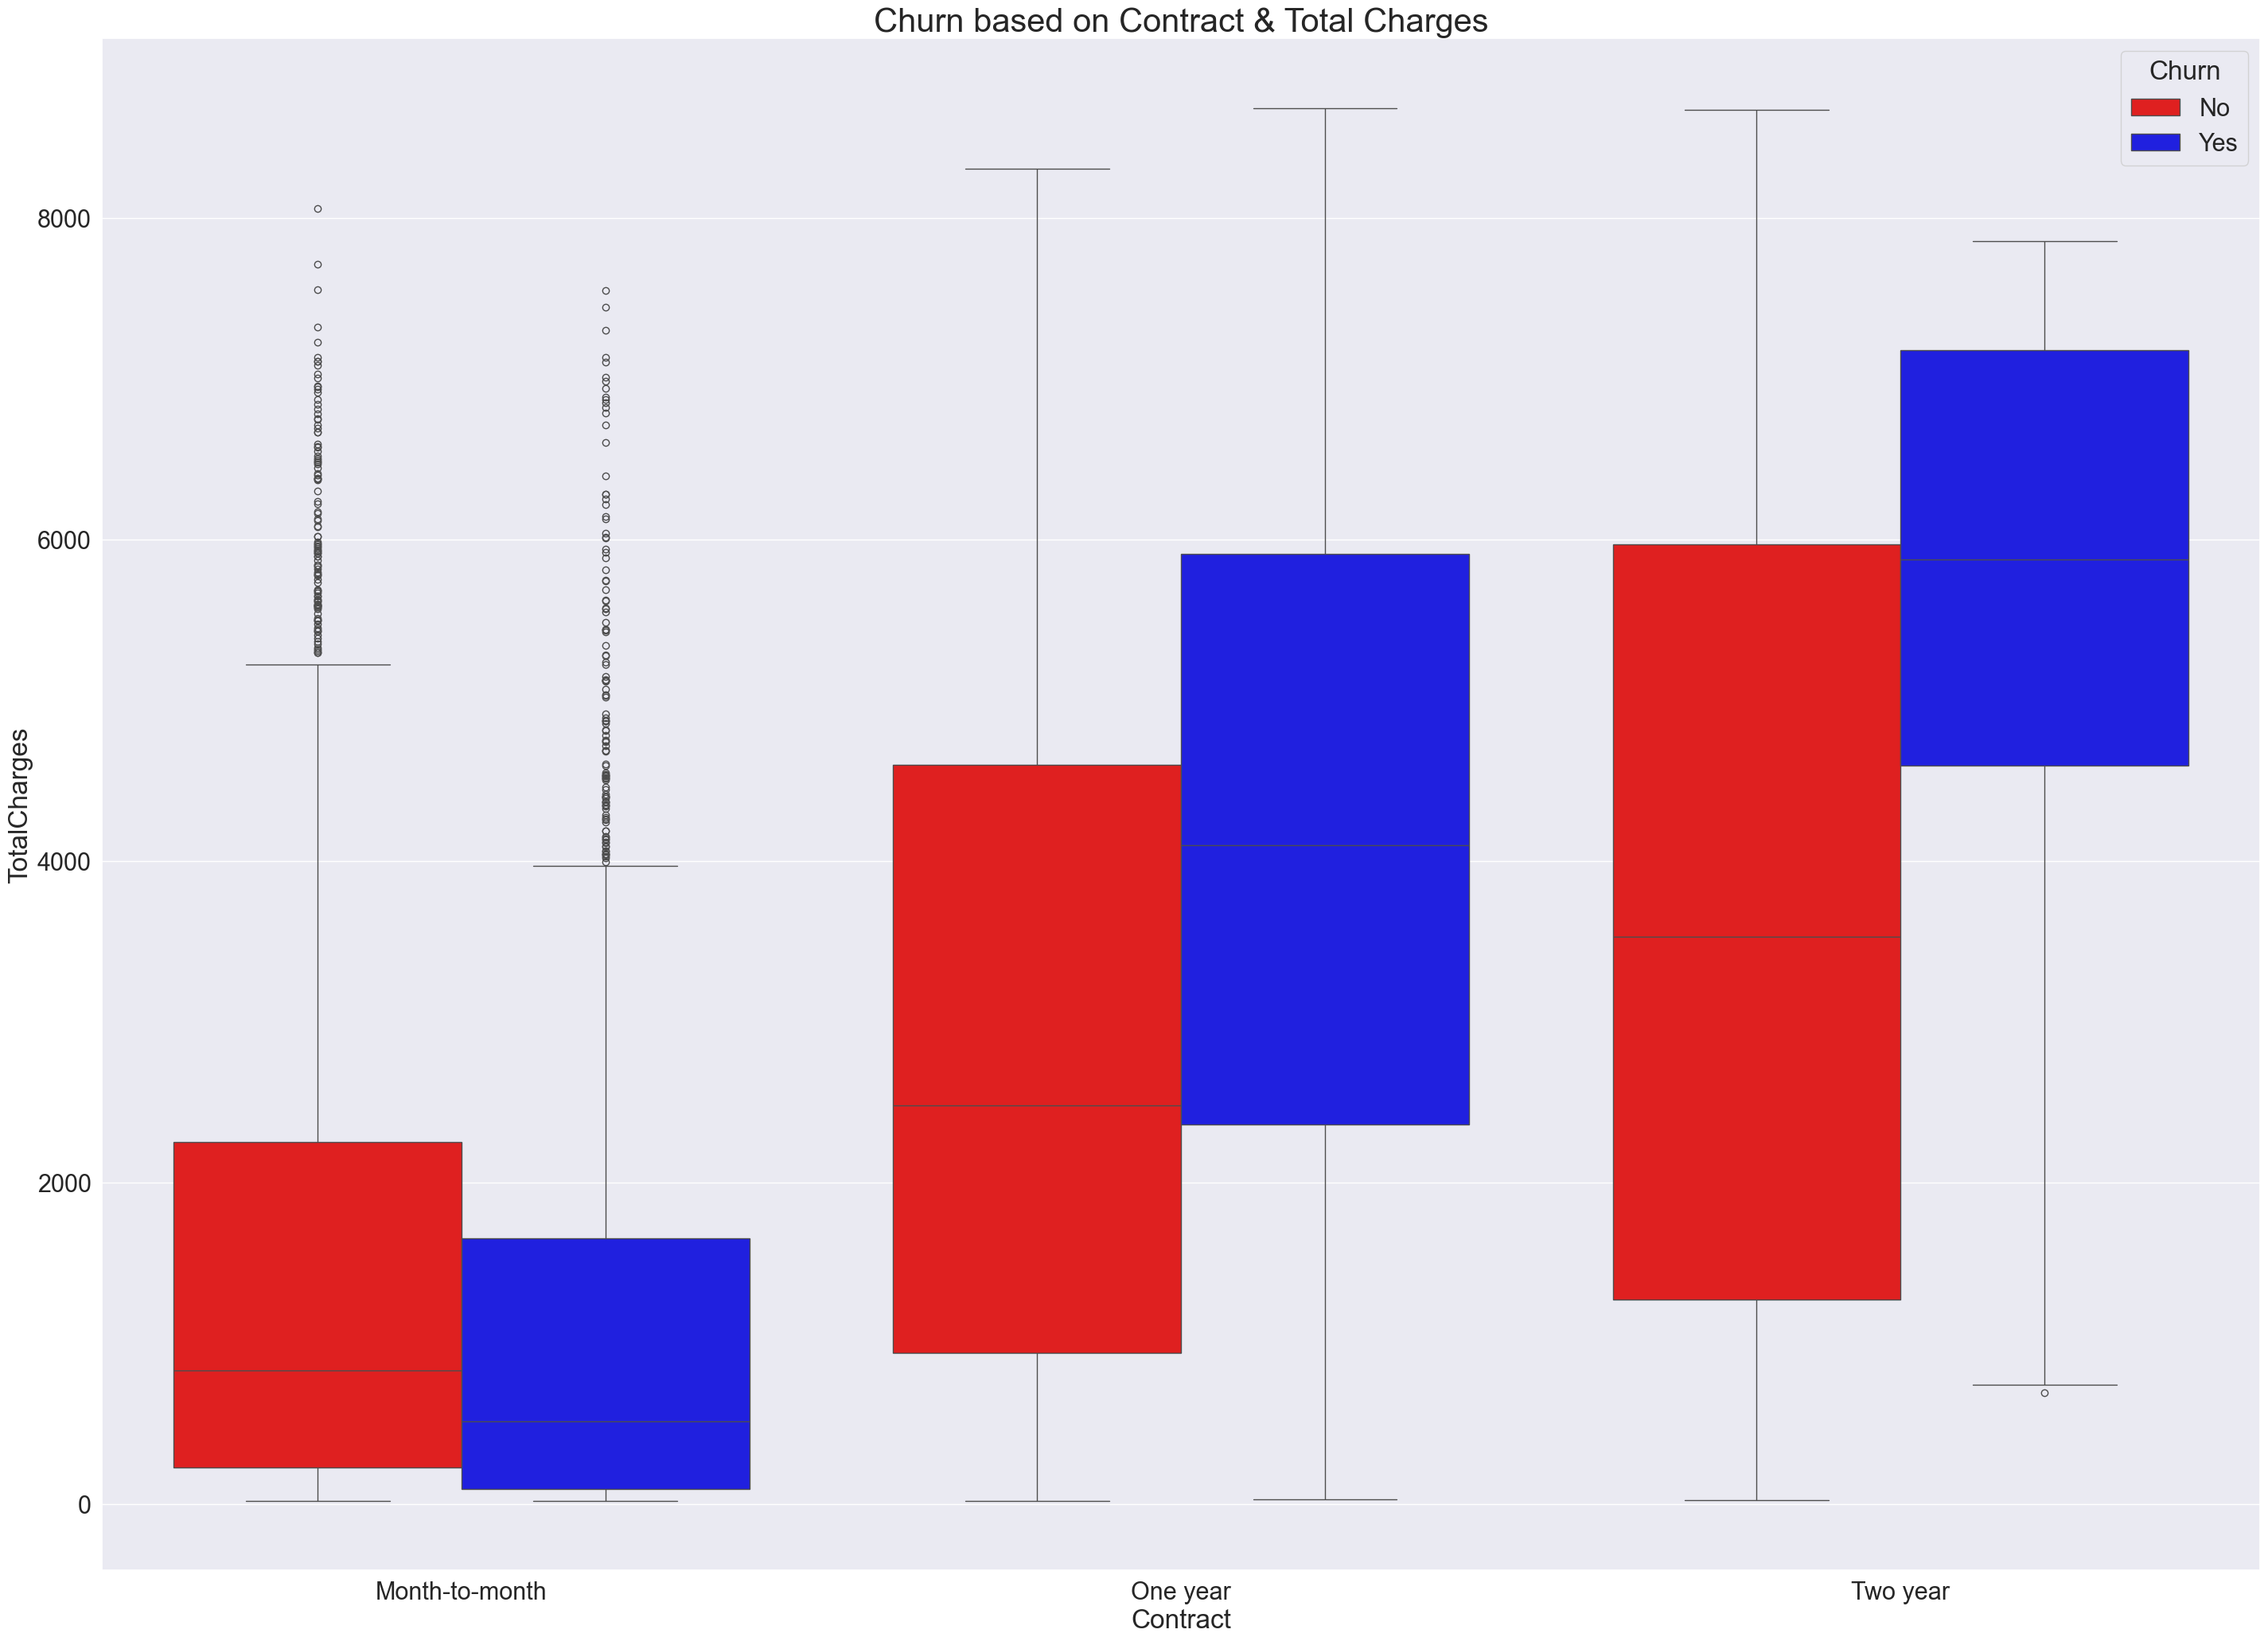

In [31]:
fig, ax = plt.subplots(figsize=(35, 25))
sns.set(font_scale=2)

sns.boxplot(data=df, x="Contract", y="TotalCharges", hue="Churn", palette={"Yes": "blue", "No": "red"})

plt.title("Churn based on Contract & Total Charges", fontsize=30)
plt.show()

Month-to-month churners show lower TotalCharges (shorter tenure) than non-churners on the same plan.

One- and two-year contract holders have similar, higher TotalCharges regardless of churn, indicating longer contracts reduce churn risk. 

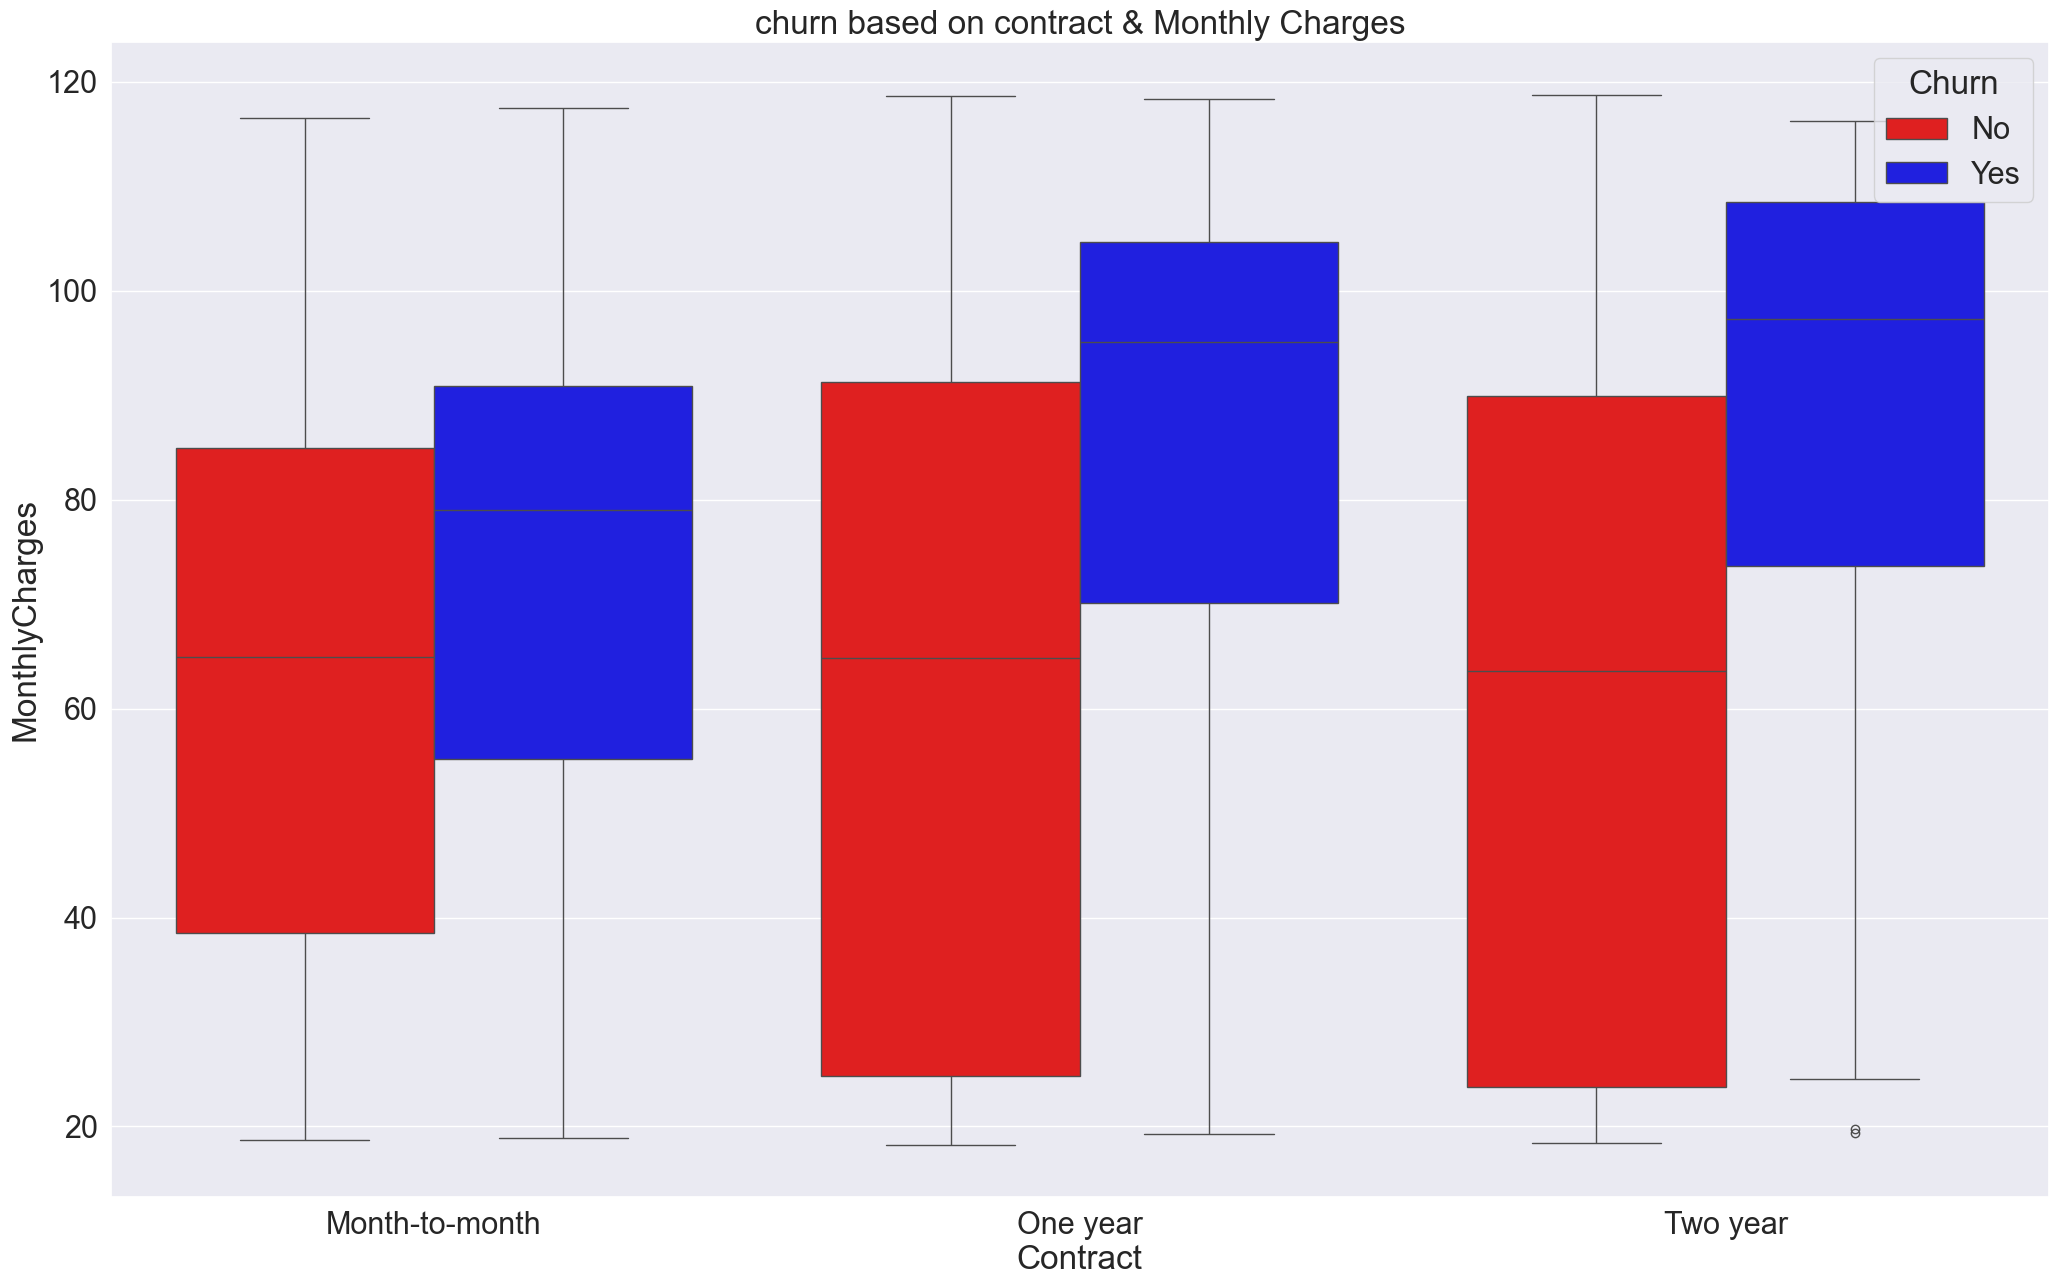

In [32]:
fig, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=2)

sns.boxplot(data=df,x="Contract",y="MonthlyCharges",hue="Churn", palette={"Yes": "blue", "No": "red"})

plt.title("churn based on contract & Monthly Charges")
plt.show()

Churners have a higher median MonthlyCharges than non-churners.

Churners exhibit more variability and high-end outliers in their monthly bills.

## Conclusions & Recommendations

1. Contract Commitment Reduces Churn:

Customers on month-to-month plans churn (43%) at much higher rates than those on 1 or 2 year contracts (11–13%), so offering incentives to switch to longer-term contracts can substantially lower churn.

2. Payment Method and Service Tier Matter:

Electronic check payers (45% churn) and fiber-optic subscribers (42% churn) are far more likely to leave than customers who pay by bank transfer/credit card (10–15%) or use DSL/no Internet (8–14%). Promoting automated payment options and improving fiber-optic service quality can help retain these higher-risk groups.

3. Early Tenure and High Monthly Charges Drive Churn:

Most churn occurs within the first 12 months (negative correlation with tenure –0.35), and higher-bill customers are more prone to leave. Targeted onboarding during the first year and relief offers for high-spend accounts can curb early-stage churn.

4. Prioritize High-Risk Segments:

The top at-risk profiles are short-tenure, month-to-month contract holders who pay by electronic check and subscribe to fiber-optic Internet with high monthly bills. By focusing retention programs (discounts, loyalty perks, and service improvements) on these four segments, the company can achieve the greatest reduction in overall churn.